*** Task 2E: CUED Part IA Flood Warning System ***


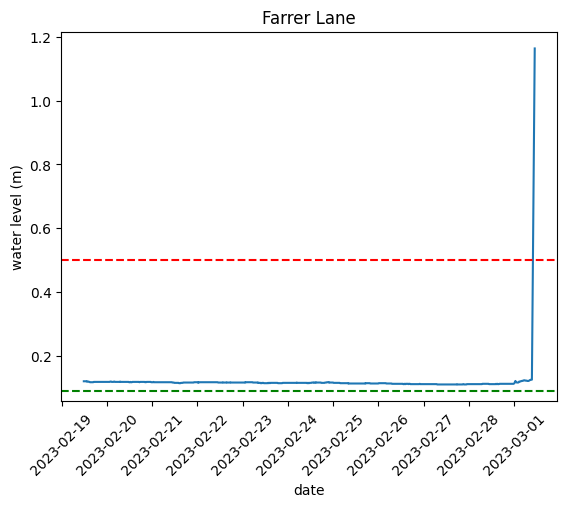

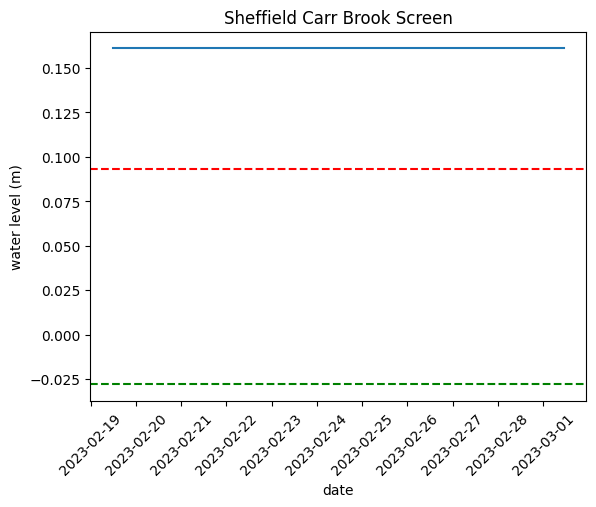

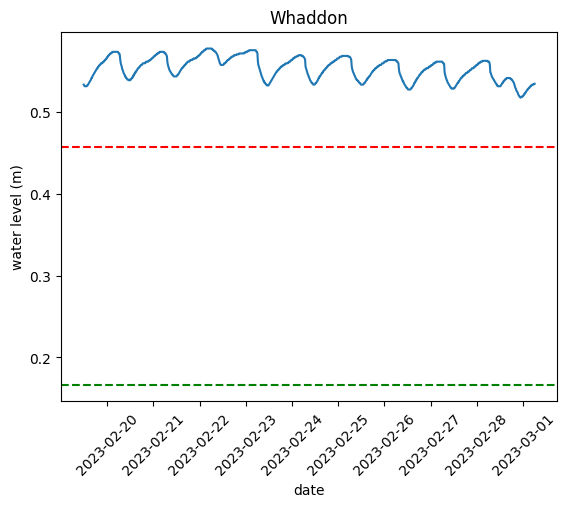

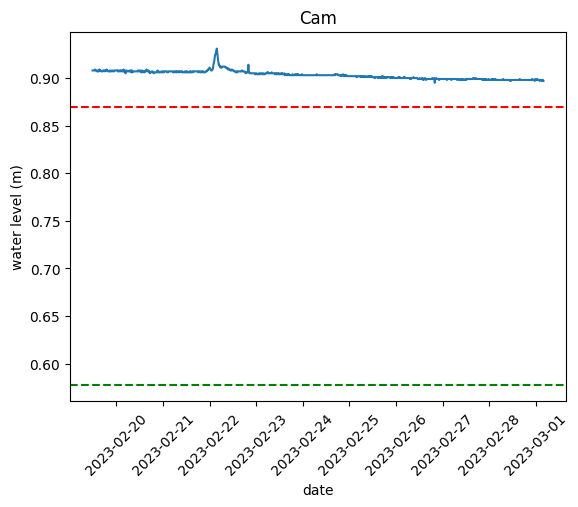

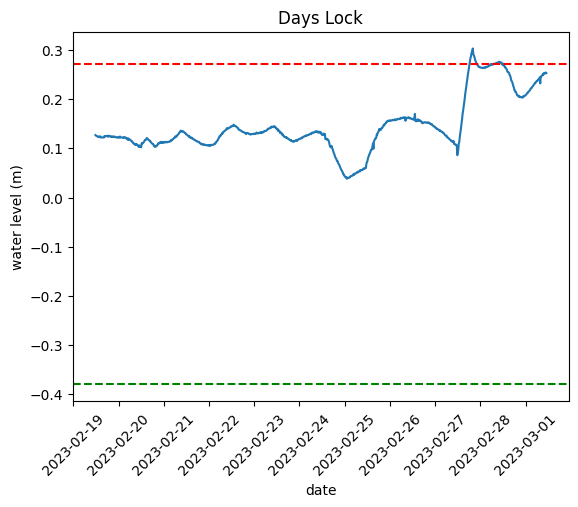

In [1]:
import matplotlib.pyplot as plt
import datetime

from floodsystem.stationdata import build_station_list, update_water_levels
from floodsystem.plot import plot_water_levels
from floodsystem.flood import stations_highest_rel_level
from floodsystem.datafetcher import fetch_measure_levels

def run():#plots the water level graphs for the 5 stations with the greatest rel water level
    stations = build_station_list()
    update_water_levels(stations)
    highest_rel_water_level_stations = stations_highest_rel_level(stations, 5)

    for station in highest_rel_water_level_stations:
        dates, levels = fetch_measure_levels(station.measure_id, dt=datetime.timedelta(days=10))
        plot_water_levels(station, dates, levels)

        plt.show()

if __name__ == "__main__":
    print("*** Task 2E: CUED Part IA Flood Warning System ***")
    run()

*** Task 2F: CUED Part IA Flood Warning System ***


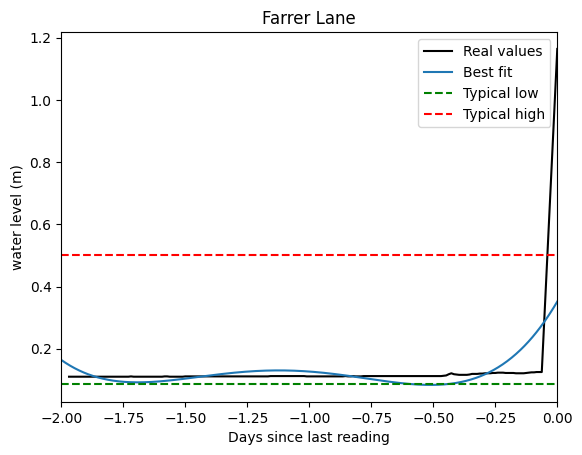

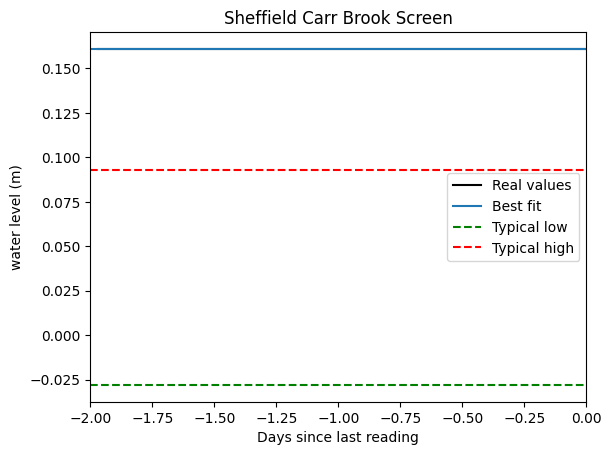

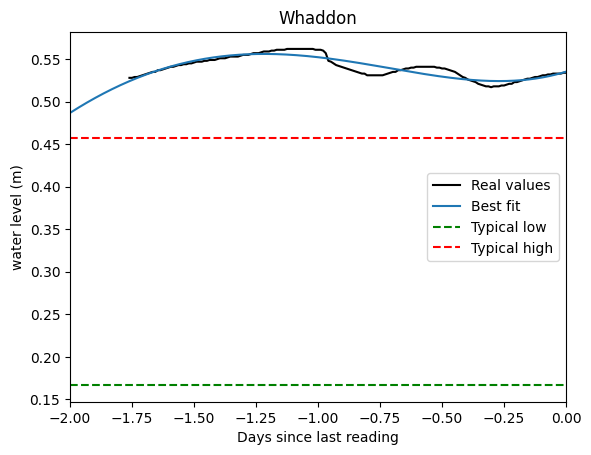

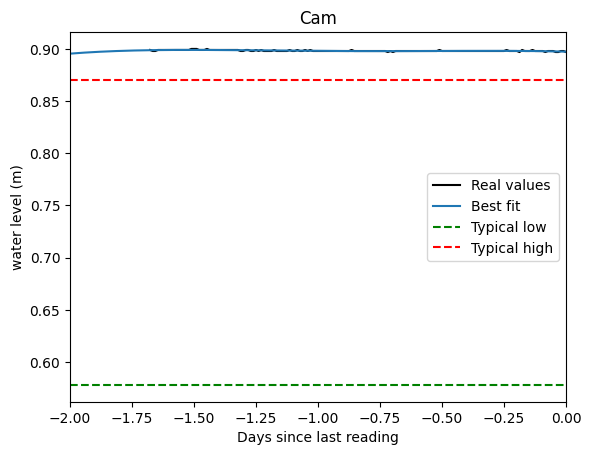

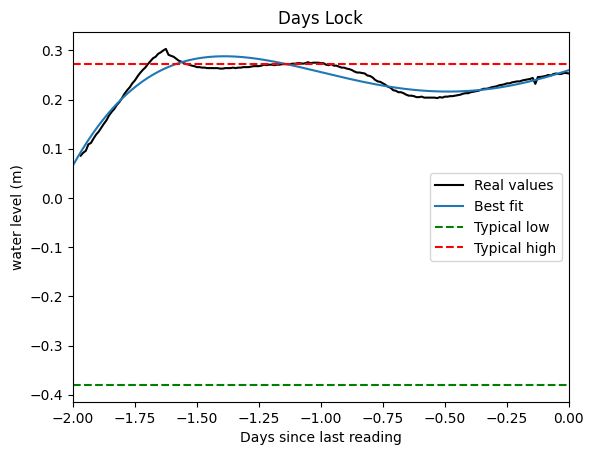

In [2]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

from floodsystem.stationdata import build_station_list, update_water_levels
from floodsystem.datafetcher import fetch_measure_levels
from floodsystem.flood import stations_highest_rel_level
from floodsystem.plot import plot_water_level_with_fit

def run():
    stations = build_station_list()
    update_water_levels(stations)
    at_risk_stations = stations_highest_rel_level(stations, 5)

    for station in at_risk_stations:
        dates, levels = fetch_measure_levels(station.measure_id,dt=datetime.timedelta(days=2))

        # plot real water levels
        date_nums = date2num(dates) - date2num(dates[0])
        plt.plot(date_nums, levels, c="black")

        #plots the line best fit
        plot_water_level_with_fit(station, dates, levels, 4)
        # plot high and low typical range
        plt.axhline(station.typical_range[0], linestyle="dashed", c="green")
        plt.axhline(station.typical_range[1], linestyle="dashed", c="red")

        plt.legend(("Real values", "Best fit", "Typical low", "Typical high"))

        plt.show()
        



if __name__ == "__main__":
    print("*** Task 2F: CUED Part IA Flood Warning System ***")
    run()